# TensorFlow를 활용한 선형회귀 실습

이 노트북에서는 TensorFlow를 사용하여 간단한 선형회귀 문제를 풀어봅니다.

## 주요 단계
1. 데이터 생성 (y = 3x + 2 + 잡음)
2. 모델 정의 (Dense Layer)
3. 손실 함수 및 최적화 방법 설정
4. 학습 진행 및 시각화


In [1]:
pip install wrapt==1.14.1

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



2.12.0


## 1. 데이터 생성

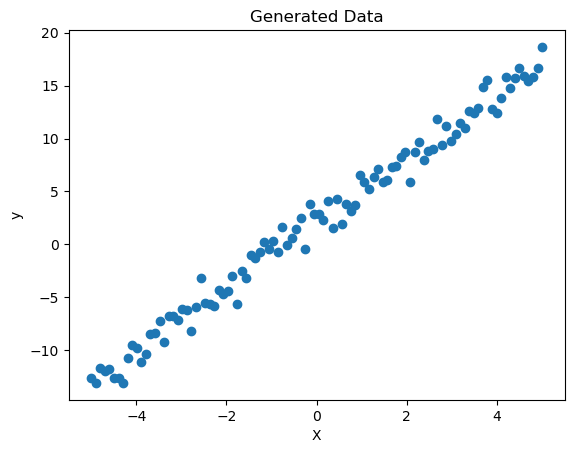

In [3]:
# y = 3x + 2 + noise
n_samples = 100
X = np.linspace(-5, 5, n_samples)
y = 3 * X + 2 + np.random.normal(0, 1, n_samples)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Data")
plt.show()

## 2. 모델 정의

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.summary()

ValueError: Unrecognized keyword arguments: ['shape']

## 3. 모델 컴파일
- 손실 함수: MSE (Mean Squared Error)
- 최적화 방법: SGD (Stochastic Gradient Descent)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='mse')

## 4. 모델 학습

In [ ]:
history = model.fit(X, y, epochs=200, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss')
plt.show()

## 5. 결과 확인

In [ ]:
W, b = model.layers[0].get_weights()
print(f"학습된 기울기 W: {W[0][0]:.3f}, 절편 b: {b[0]:.3f}")

y_pred = model.predict(X)

plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.legend()
plt.show()

## 생각해보기
- 학습 샘플 수가 작아지면 어떻게 되는가?

과적합 가능성이 증가하고 일반화 성능이 떨어져 모델이 안정적으로 수렴하지 않음

- 학습 샘플에 잡음이 많으면 어떻게 되는가? 이 경우 학습 데이터가 많이 필요한가?

모델이 잡음까지 학습하며 이경우 학습데이터가 많이 필요해짐, 많은 데이터를 통해 모델이 노이즈를 평균하 한 뒤에야 진짜 패턴만 학습 가능해짐